#  [Statistics]  Simple Linear Regression - (3) Coefficient of Determination

##  Coefficient of Determination  (R-squared value)

Coefficient of determination is used to identify "the strength" of a model. It explains how well the model is to predict the dependent variable based on independent variable. In other words, coefficient of determination reflect the variance in dependent variable that can be explained by the regression model.

#### The value of coefficient of determination, r-squared ranges between 0 and 1. 
- The value of R-squared equal to 0 means that linear model can explain 0% of dependent variable using independent variable.
- The value of R-squared equal to 0.5 means that linear model can explain 50% of dependent variable using independent variable.
- The value of R-squared equal to 1 means that linear model can explain 100% of dependent variable using independent variable.

#### The application of coefficient of determination
- Scientific research
- Economics
- Risk analyst

## Calculation of  Coefficient of Determination

The calculation of  Coefficient of Determination, r-squared is as below.

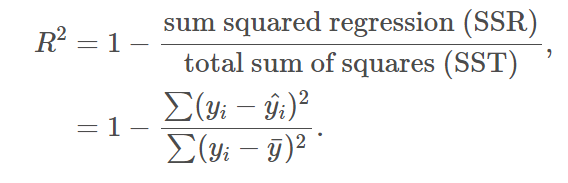

#### Import library

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import library for linear regression

import statsmodels.api as sm

%matplotlib inline

#### Make dataset

In [2]:
# create dataset and assign x and y
# we create an artificial data of bills(independent variable) and tips given(dependent variable)

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"bills" : x, "tips" : y})
x = df.bills
y = df.tips
df

,bills,tips
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


Text(0, 0.5, 'Tips amount ($)')

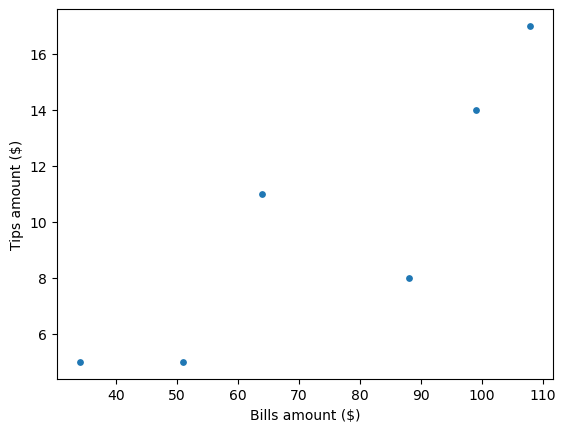

In [3]:
# scatterplot for x(independent variable) and y(dependent variable)
# see the trend using scatter plot
# we can notice upward trend between independent variable and dependent variable

plt.scatter(x, y, s  = 15 )
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")

## 1. Calculate R-squared value using python

#### calculate parameter of linear regression model

In [11]:
x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"x" : x, "y" : y})
df['x-x̄'] = df['x'] - np.mean(df['x'])
df['y-ȳ'] = df['y'] - np.mean(df['y'])
df['(x-x̄)(y-ȳ)'] = df['x-x̄'] * df['y-ȳ']
df['(x-x̄)^2'] = df['x-x̄']**2
df['(y-ȳ)^2'] = df['y-ȳ']**2
df

,x,y,x-x̄,y-ȳ,(x-x̄)(y-ȳ),(x-x̄)^2,(y-ȳ)^2
0,34,5,-40.0,-5.0,200.0,1600.0,25.0
1,108,17,34.0,7.0,238.0,1156.0,49.0
2,64,11,-10.0,1.0,-10.0,100.0,1.0
3,88,8,14.0,-2.0,-28.0,196.0,4.0
4,99,14,25.0,4.0,100.0,625.0,16.0
5,51,5,-23.0,-5.0,115.0,529.0,25.0


In [16]:
# calculate the slope of linear line

b1 = np.round((df['(x-x̄)(y-ȳ)'].sum() / df['(x-x̄)^2'].sum()),4)
b1

0.1462

In [22]:
# calculate the y-intercept of linear line

b0 = np.round(np.mean(df['y'] - b1 * np.mean(df['x'])),4)
b0

-0.8188

In [26]:
print(f'The linear regression is {b0} + {b1}x')

The linear regression is -0.8188 + 0.1462x


#### calculate r-squared

In [25]:
# calculate r-squared

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"x" : x, "y" : y})
df['x-x̄'] = df['x'] - np.mean(df['x'])
df['y-ȳ'] = df['y'] - np.mean(df['y'])
df['(x-x̄)(y-ȳ)'] = df['x-x̄'] * df['y-ȳ']
df['(x-x̄)^2'] = df['x-x̄']**2
df['(y-ȳ)^2'] = df['y-ȳ']**2
df['ŷ'] = b0 + b1 * df['x']
df['(y-ŷ)^2'] = (df['y'] - (b0 + b1 * df['x'])) ** 2
df

,x,y,x-x̄,y-ȳ,(x-x̄)(y-ȳ),(x-x̄)^2,(y-ȳ)^2,ŷ,(y-ŷ)^2
0,34,5,-40.0,-5.0,200.0,1600.0,25.0,4.1520,0.719104
1,108,17,34.0,7.0,238.0,1156.0,49.0,14.9708,4.117653
2,64,11,-10.0,1.0,-10.0,100.0,1.0,8.5380,6.061444
3,88,8,14.0,-2.0,-28.0,196.0,4.0,12.0468,16.376590
4,99,14,25.0,4.0,100.0,625.0,16.0,13.6550,0.119025
5,51,5,-23.0,-5.0,115.0,529.0,25.0,6.6374,2.681079


In [28]:
r_squared_value =  1 - df['(y-ŷ)^2'].sum()/ df['(y-ȳ)^2'].sum()
r_squared_value

0.7493758779999999

In [34]:
print(f'''
<R squared interpretation>

{round(r_squared_value,4)*100}% of total sum of squares can be explained by using the estimated regression equation.
The remainder {round(1- r_squared_value,4)*100}% is the error that cannot be explained by the model.
''')


<R squared interpretation>

74.94% of total sum of squares can be explained by using the estimated regression equation.
The remainder 25.06% is the error that cannot be explained by the model.



## 2. Calculate R-squared value using statsmodels

In [36]:
# add constant and use OLS fit model
# we have to add constant to X to fit into statsmodels.OLS

X = sm.add_constant(x)
model = sm.OLS(y,X).fit()

In [40]:
r_squared_value = model.rsquared
r_squared_value

0.7493758915834522

In [41]:
print(f'''
<R squared interpretation>

{round(r_squared_value,4)*100}% of total sum of squares can be explained by using the estimated regression equation.
The remainder {round(1- r_squared_value,4)*100}% is the error that cannot be explained by the model.
''')


<R squared interpretation>

74.94% of total sum of squares can be explained by using the estimated regression equation.
The remainder 25.06% is the error that cannot be explained by the model.

